### 10 / 31 教學內容

- 1. 如何設定亂數


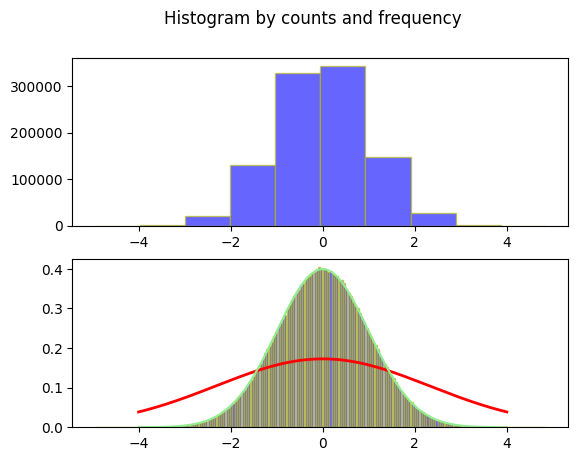

In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 1000000
x_sample = np.linspace(-4, 4, 1000)

# 產生亂數的function
rng = np.random.default_rng()  # (seed=...)
x = rng.normal(loc=0, scale=1, size=n)
# x = norm.rvs(loc = 0, scale = 1, size = 1000)
x_pdf = norm.pdf(x_sample, loc=x_sample.mean(), scale=x_sample.std())
x_pdf2 = norm.pdf(x_sample, loc=0, scale=1)

fig, (ax1, ax2) = plt.subplots(2, 1)
# typical histogram by counts
ax1.hist(x, bins=10, alpha=0.6, color='b', edgecolor='y', linewidth=1)
# histogram by frequency
ax2.hist(x, bins=200, alpha=0.6, color='b', edgecolor='y',
         linewidth=1, density=True, rwidth=0.9)
ax2.plot(x_sample.reshape(-1, 1), x_pdf, color="red", linewidth=2)
ax2.plot(x_sample.reshape(-1,1),x_pdf2,color="lightgreen")
plt.suptitle('Histogram by counts and frequency')
plt.show()


#### Boxplot 

- 2張圖對照，有不同設想

- 圖 1 : 正常版 ，圖 2 : 

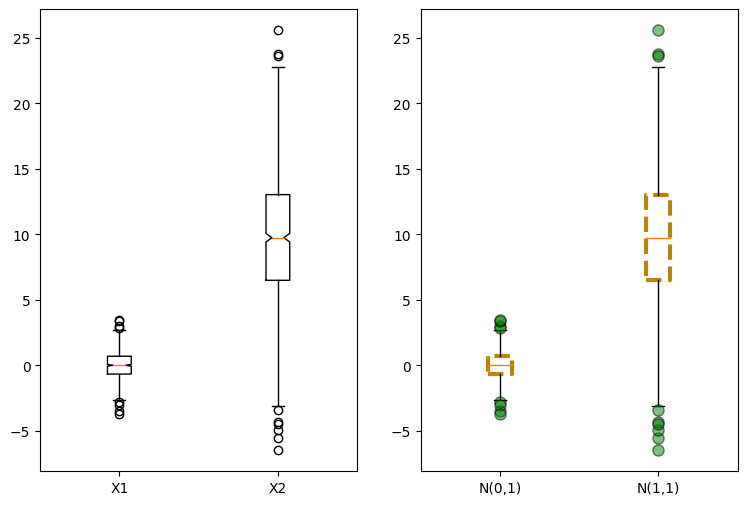

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

rng = np.random.default_rng(100000)  # seed is fixed
n = 1000  # sampe size
x1 = norm.rvs(size=n, random_state=rng)  # standard normal
x2 = norm.rvs(loc=10, scale=5, size=n)
# run a few times and check the random numbers generated
# with and without fixing the random seed.
# print(x1[0:3])
# print(x2[0:3])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 6))
ax1.boxplot(np.c_[x1, x2], notch=True, vert=True, labels=['X1', 'X2'])
# plt.show()

# use boxplot properties
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green',
                  markersize=8, linestyle='none',alpha=0.5)  # define outliers
labels = ['N(0,1)', 'N(1,1)']
ax2.boxplot(np.c_[x1, x2], boxprops=boxprops,
            flierprops=flierprops, labels=labels)
plt.show()


### 常態機率圖  ( Normal Pobability Plot )

- np.random.chisquare() 卡方亂數產生器



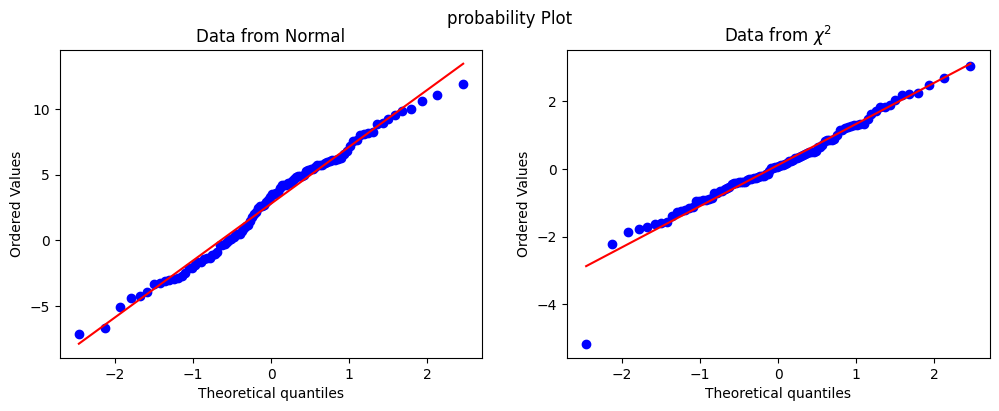

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import beta,t

x1 = np.random.normal(loc=2, scale=5, size=100)
x2 = np.random.chisquare(df=2, size=100)
# x_beta=beta.rvs(a=9,b=1,size=100)
x_t = t.rvs(df=10,size=100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
stats.probplot(x1, dist="norm", plot=ax1)
stats.probplot(x_t, dist="norm", plot=ax2)
# stats.probplot(x2, dist = "chi2", sparams = 2, plot = ax2)
ax1.set_title('Data from Normal')
ax2.set_title('Data from $\chi^2$')
plt.suptitle('probability Plot')
plt.show()


### 經驗累積密度函數 Empirical CDF (ECDF）

- 繪製一組來自常態分配 N(0,1) 樣本的 ECDF 圖，並比較 ECDF 圖與真實 CDF 圖之差異。

- x ( 1 ) ， x ( 2 ) ， x ( 3 ) 用 sort 排列 ( 大 -> 小 or 小 -> 大 )

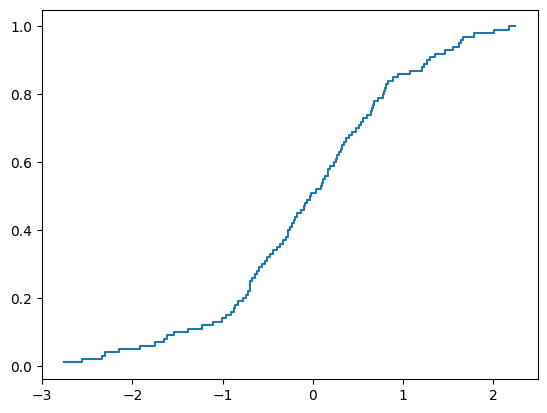

In [2]:
from matplotlib.lines import drawStyles
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

n=100
rng=np.random.default_rng()
x=norm.rvs(loc=0,scale=1,size=n)
x_sorted=np.sort(x)
y=np.arange(1,n+1) / n 

plt.plot(x_sorted,y,drawstyle='steps-mid')

